# Capstone Project-Setting up a business in the city of Nice in the Cote d'Azur region of France

### 1.INTRODUCTION:BUSINESS PROBLEM

A client  wants to invest in  a business in Nice.Nice is a very popular destination for tourists for its exquisite beaches and warm coastal temperature throughout the year.
Before investing,he wants to get an idea of the popular venues of Nice.This will help the client in deciding the type of business he would like to invest in.

Côte d'Azur is a coastal region of southeastern France. It includes famously many popular beach resorts such as Saint-Tropez , Cannes, Nice and Antibes,to name a few.
The map of Cote d'Azur region:
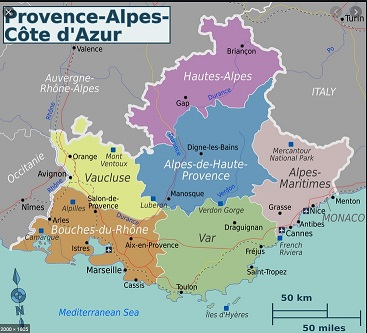

### The following data of Nice has been obtained from the site:https://en.meet-in-nice.com/key-figures
  * Nice receives visitors from the whole wolrd, and has all the necessary facilities to further develop its capabilities.
  * Number one tourist destination after Paris.
  * Around 5 million visitors per year.
  * 40% of the tourist flow on the French Riviera, worth 1.5 billion in economic benefits.
  * Leading conference city in France after Paris.
  * One of the highest number of hotel rooms, and the best quality accommodation after Paris, accounting for a third of french  riviera stays, with a capacity approaching 200 establishments and 10 000 rooms.
  * One of the top French cruise ports: Nice/Villefranche-sur-Mer with 487 440 passengers and over 300 ships mooring in the port each year.
  * Highest concentration of museums after Paris, with 19 museums and art galleries.
  * 1st city in France with vineyards within the city limits.

### The following statistics gives an insight into the trends of tourism in France(Source-Statista)
### 1. Number of tourists who visited France from 2010-2018:
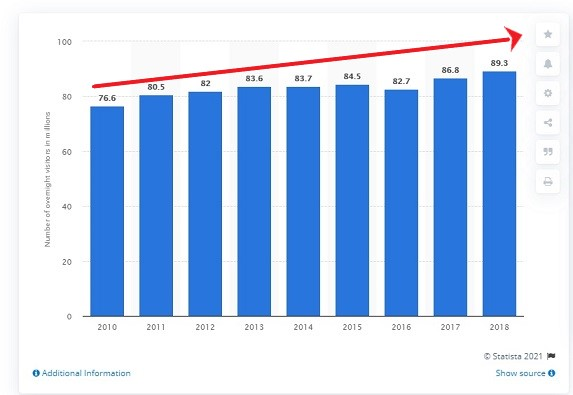

### 2.Regions of France based on their popularity among tourists:
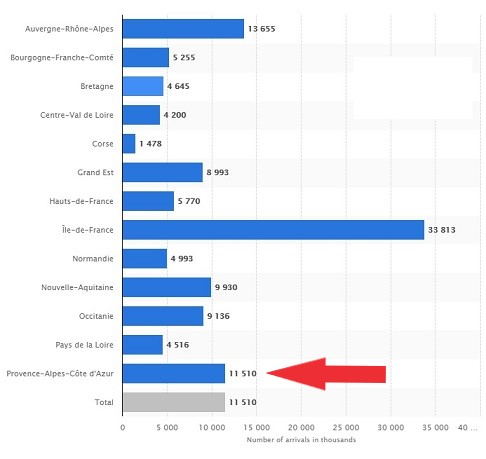

### From above statistics ,we can see that tourism is on the rise in France and Cote d'azur is the third most popular region among tourists


## Possible Stakeholders:

This project is going to be an interest to anyone or any group who is looking forward to investing in a business in Nice. In post-pandemic world, tourism is going to rise again as people will be more than happy to step outside and explore and break free from the confinements of their homes.The French Riviera in Nice has been drawing thousands and thousands of tourists every year and a business that will cater to the needs of tourists is surely going to be successful here.

## 2. DATA SECTION:
The following factors will be considered in solving the business problem:
  1. Exploring the popular venues and restaurants of Nice.
  2. Deciding the top 3 popular venues and restaurants
  3. Visualizing the location of these venues and restaurants.

We will use the following to generate the data:
  1. Geopy python package-to generate the coordinates of Nice.
  2. Foursquare API- to get a list of popular venuesand restaurants in the city.
  3. Folium- This will be used to visualise the locations of the venues.
  4. Matplotlib- for visual statistics

1. First we need to import the necessary libraries and generate the Foursquare developer credentials.

In [4]:
## Importing the necessary libraries
import requests 
import pandas as pd
import numpy as np 
import random 
from geopy.geocoders import Nominatim 
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
import folium 
print('Libraries imported.')

Libraries imported.


In [5]:
#Foursquare developer credentials
CLIENT_ID = 'SKD2YABLLEZL03VBVKELYLDZCZKOHJ1IWV4ABKP03AA5MHY2' 
CLIENT_SECRET = 'XTXX3DEO2IEWLL3PO4I3LX0F2KSTBSTCDZPFNUXHW0NR4BNH' 
ACCESS_TOKEN = 'QKCMVETJZIDDLIGWHSHW0DPCI45DFWBQP4D0OAHY2MHYHH1M'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SKD2YABLLEZL03VBVKELYLDZCZKOHJ1IWV4ABKP03AA5MHY2
CLIENT_SECRET:XTXX3DEO2IEWLL3PO4I3LX0F2KSTBSTCDZPFNUXHW0NR4BNH


2. Now we will use Geopy python package to generate the coordinates of Nice city.

In [6]:
## Generating the coordinates of Nice
address = 'Nice,France'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The coordinates of Nice are:latitude {},longitude {}.".format(latitude, longitude))

The coordinates of Nice are:latitude 43.7009358,longitude 7.2683912.


3. Once the coordinates are generated, we will use the Fourquare API to generate a list of popular venues in Nice within a radius 0f 5000 metres

In [7]:
# url to be passed
radius=5000
url_venue= 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url_venue

'https://api.foursquare.com/v2/venues/explore?client_id=SKD2YABLLEZL03VBVKELYLDZCZKOHJ1IWV4ABKP03AA5MHY2&client_secret=XTXX3DEO2IEWLL3PO4I3LX0F2KSTBSTCDZPFNUXHW0NR4BNH&ll=43.7009358,7.2683912&v=20180604&radius=5000&limit=30'

In [8]:
results_venues= requests.get(url_venue).json()
results_venues

{'meta': {'code': 200, 'requestId': '602cb755c005d56f94780bc1'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Nice',
  'headerFullLocation': 'Nice',
  'headerLocationGranularity': 'city',
  'totalResults': 164,
  'suggestedBounds': {'ne': {'lat': 43.74593584500005,
    'lng': 7.330519508437207},
   'sw': {'lat': 43.65593575499996, 'lng': 7.206262891562793}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b924477f964a52022ef33e3',
       'name': 'Place Masséna',
       'location': {'address': 'Place Masséna',
        'lat': 43.69731349105142,
        'lng': 7.2703724955644145,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.69731349105142,
          'lng': 7

In [9]:
items_venues = results_venues['response']['groups'][0]['items']
items_venues[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4b924477f964a52022ef33e3',
  'name': 'Place Masséna',
  'location': {'address': 'Place Masséna',
   'lat': 43.69731349105142,
   'lng': 7.2703724955644145,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.69731349105142,
     'lng': 7.2703724955644145}],
   'distance': 433,
   'postalCode': '06000',
   'cc': 'FR',
   'city': 'Nice',
   'state': "Provence-Alpes-Côte d'Azur",
   'country': 'France',
   'formattedAddress': ['Place Masséna', '06000 Nice', 'France']},
  'categories': [{'id': '4bf58dd8d48988d164941735',
    'name': 'Plaza',
    'pluralName': 'Plazas',
    'shortName': 'Plaza',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4b924477f964a52022ef33e3-0'}

In [11]:
# flatten JSON and storing in a dataframe
df_venues = json_normalize(items_venues)
df_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.venuePage.id
0,e-0-4b924477f964a52022ef33e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b924477f964a52022ef33e3,Place Masséna,Place Masséna,43.697313,7.270372,"[{'label': 'display', 'lat': 43.69731349105142...",433,...,FR,Nice,Provence-Alpes-Côte d'Azur,France,"[Place Masséna, 06000 Nice, France]","[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",0,[],NaN,NaN
1,e-0-526aee9a11d2c5998e674ede-1,0,"[{'summary': 'This spot is popular', 'type': '...",526aee9a11d2c5998e674ede,Promenade du Paillon,Théâtre de Verdure à Esplanade de la Bourgada,43.697924,7.272986,"[{'label': 'display', 'lat': 43.69792361165916...",499,...,FR,Nice,Provence-Alpes-Côte d'Azur,France,[Théâtre de Verdure à Esplanade de la Bourgada...,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN
2,e-0-4f9d5034e4b04dce45ae9a3c-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f9d5034e4b04dce45ae9a3c,La Fontaine du Soleil (Fontaine du Soleil),Place Masséna,43.696558,7.270635,"[{'label': 'display', 'lat': 43.69655828238664...",519,...,FR,Nice,Provence-Alpes-Côte d'Azur,France,"[Place Masséna, 06000 Nice, France]","[{'id': '56aa371be4b08b9a8d573547', 'name': 'F...",0,[],NaN,NaN
3,e-0-507099abe4b0ddd4694c4fc0-3,0,"[{'summary': 'This spot is popular', 'type': '...",507099abe4b0ddd4694c4fc0,Le Séjour Café,11 rue Grimaldi,43.698960,7.265046,"[{'label': 'display', 'lat': 43.69895990560133...",347,...,FR,Nice,Provence-Alpes-Côte d'Azur,France,"[11 rue Grimaldi (Rue Maréchal Joffre), 06000 ...","[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",0,[],Rue Maréchal Joffre,NaN
4,e-0-4faa9929e4b0956af005d730-4,0,"[{'summary': 'This spot is popular', 'type': '...",4faa9929e4b0956af005d730,LAC Chocolatier,42 rue Gioffredo,43.698608,7.271108,"[{'label': 'display', 'lat': 43.69860809033705...",339,...,FR,Nice,PACA,France,"[42 rue Gioffredo, 06000 Nice, France]","[{'id': '52f2ab2ebcbc57f1066b8b31', 'name': 'C...",0,[],NaN,NaN


In [12]:
# Creating a function to extract the category of venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [13]:
# Cleaning the datframe df_venues and creating a new dataframe df_explore 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_explore =df_venues.loc[:, filtered_columns]

# filter the category for each row
df_explore['venue.categories'] = df_explore.apply(get_category_type, axis=1)

# clean columns
df_explore.columns = [col.split(".")[-1] for col in df_explore.columns]

df_explore.head(10)

,name,categories,lat,lng
0,Place Masséna,Plaza,43.697313,7.270372
1,Promenade du Paillon,Park,43.697924,7.272986
2,La Fontaine du Soleil (Fontaine du Soleil),Fountain,43.696558,7.270635
3,Le Séjour Café,French Restaurant,43.698960,7.265046
4,LAC Chocolatier,Chocolate Shop,43.698608,7.271108
5,Promenade des Anglais,Waterfront,43.694917,7.265499
6,Peixes,Seafood Restaurant,43.696015,7.270932
7,Mon Petit Café,French Restaurant,43.699053,7.264998
8,Amorino,Ice Cream Shop,43.697150,7.265841
9,Les Deux Canailles,French Restaurant,43.698089,7.272101


In [14]:
print("No of rows and columns in df_explore:",(df_explore.shape))

No of rows and columns in df_explore: (30, 4)


We will create a separate query to generate a list of **popular restaurants** within a radius of 5000 meters in Nice.

In [15]:
## Creating a sseparate query to find out the popular restaurants in Nice
search_query = 'Restaurant'
radius = 5000
url_rest= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url_rest

'https://api.foursquare.com/v2/venues/search?client_id=SKD2YABLLEZL03VBVKELYLDZCZKOHJ1IWV4ABKP03AA5MHY2&client_secret=XTXX3DEO2IEWLL3PO4I3LX0F2KSTBSTCDZPFNUXHW0NR4BNH&ll=43.7009358,7.2683912&oauth_token=QKCMVETJZIDDLIGWHSHW0DPCI45DFWBQP4D0OAHY2MHYHH1M&v=20180604&query=Restaurant&radius=5000&limit=30'

In [16]:
results_rest = requests.get(url_rest).json()
results_rest

{'meta': {'code': 200, 'requestId': '602cb7a6f3736534d0e70648'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4df0a7bf3151de684c180ce9',
    'name': "Restaurant d'Angleterre",
    'location': {'address': "25, rue d'Angleterre",
     'lat': 43.70351391250913,
     'lng': 7.26445198059082,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.70351391250913,
       'lng': 7.26445198059082}],
     'distance': 427,
     'postalCode': '06000',
     'cc': 'FR',
     'city': 'Nice',
     'state': "Provence-Alpes-Côte d'Azur",
     'country': 'France',
     'formattedAddress': ["25, rue d'Angleterre", '06000 Nice', 'France']},
    'categories': [{'id': '4bf58dd8d48988d10c941735',
      'name': 'French Restaurant',
      'pluralName': 'French Restaurants',
      'shortName': 'French',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_',
       'suffix': '.png'},
      'primary': True}],
    'ref

In [17]:
rest=results_rest['response']['venues']
rest_df= json_normalize(rest)
rest_df.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,venuePage.id
0,4df0a7bf3151de684c180ce9,Restaurant d'Angleterre,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",v-1613543334,False,"25, rue d'Angleterre",43.703514,7.264452,"[{'label': 'display', 'lat': 43.70351391250913...",427,06000,FR,Nice,Provence-Alpes-Côte d'Azur,France,"[25, rue d'Angleterre, 06000 Nice, France]",NaN,NaN,NaN
1,4d7ec78d64b84eb9d02bbe1a,Restaurant Zen,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1613543334,False,27 rue d'Angleterre,43.703724,7.264572,"[{'label': 'display', 'lat': 43.70372428101933...",436,06000,FR,Nice,Provence-Alpes-Côte d'Azur,France,"[27 rue d'Angleterre, 06000 Nice, France]",NaN,NaN,NaN
2,5381d56f498e15919e90f2a2,Havvelie Le Rajaa Bar Restaurant Indien,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1613543334,False,"35, Rue D'Angleterre",43.704262,7.264722,"[{'label': 'display', 'lat': 43.70426177978515...",473,06000,FR,Nice,Provence-Alpes-Côte d'Azur,France,"[35, Rue D'Angleterre, 06000 Nice, France]",NaN,NaN,NaN
3,4ec7a71902d5888e9c060f18,L'Horloge Restaurant,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",v-1613543334,False,Felix Faux,43.697930,7.272143,"[{'label': 'display', 'lat': 43.69792979138946...",450,0600,FR,Nice,Provence-Alpes-Côte d'Azur,France,"[Felix Faux, 0600 Nice, France]",NaN,NaN,NaN
4,4d230ac9bcbf2c0fa5759be4,Restaurant du Gesù,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",v-1613543334,False,1 place du Jésus,43.696779,7.277080,"[{'label': 'display', 'lat': 43.69677873044361...",838,06300,FR,Nice,PACA,France,"[1 place du Jésus (Rue Droite), 06300 Nice, Fr...",Rue Droite,NaN,NaN


In [18]:
# Cleaning the dataframe rest _df and generating a new dataframe restaurant_df
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
restaurant_df=rest_df.loc[:, filtered_columns]

# filter the category for each row
restaurant_df['categories'] = restaurant_df.apply(get_category_type, axis=1)

# clean columns
restaurant_df.columns = [col.split(".")[-1] for col in restaurant_df.columns]

restaurant_df.head(10)


,name,categories,lat,lng
0,Restaurant d'Angleterre,French Restaurant,43.703514,7.264452
1,Restaurant Zen,Japanese Restaurant,43.703724,7.264572
2,Havvelie Le Rajaa Bar Restaurant Indien,Indian Restaurant,43.704262,7.264722
3,L'Horloge Restaurant,French Restaurant,43.697930,7.272143
4,Restaurant du Gesù,Mediterranean Restaurant,43.696779,7.277080
5,Davisto Restaurant,Italian Restaurant,43.695429,7.255191
6,Restaurant nice centre Casa Nissa,Italian Restaurant,43.698149,7.270324
7,Restaurant Le Mllo's,Mediterranean Restaurant,43.703526,7.265863
8,Restaurant Les Quatre Saisons,Italian Restaurant,43.701692,7.264117
9,Restaurant Poséidon,Seafood Restaurant,43.700668,7.272517


In [19]:
print("No of rows and columns in restaurant_df dataframe:",(restaurant_df.shape))

No of rows and columns in restaurant_df dataframe: (30, 4)


## 3. METHODOLOGY
Now that we have generated the data of popular venues and restaurants in Nice within a radius of 5000 meters, we will carry out data exploratory analysis to meet our business needs.
Using exploratory data analysis ,we will do the following:
1. Find the most popular venues and restaurant type
2. Finding a business based on the popularity of these venues and restaurant type.
3. Visualizing the location of venues and restaurants.

### First let's start analyzing the venues data.Using Folium,we will visualize the location these venues first.

In [20]:
Nice_explore_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Nice
# add a red circle marker to represent Nice
folium.CircleMarker(
    [latitude, longitude],
    radius=30,
    color='green',
    popup='NICE',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.5
).add_to(Nice_explore_map )

# add popular venues to the map as blue circle markers
for lat, lng, label in zip(df_explore.lat, df_explore.lng, df_explore.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(Nice_explore_map)

# display map
Nice_explore_map

Using value_counts() we will find out the frequency of each venue

In [21]:
#Finding the frequency of each type of venues
df_explore['categories'].value_counts()

French Restaurant            5
Park                         3
Ice Cream Shop               3
Hotel                        2
Chocolate Shop               1
Mediterranean Restaurant     1
Scenic Lookout               1
Tapas Restaurant             1
Seafood Restaurant           1
Middle Eastern Restaurant    1
Italian Restaurant           1
Bagel Shop                   1
Waterfall                    1
Hill                         1
Hostel                       1
Plaza                        1
Beach                        1
Waterfront                   1
Coffee Shop                  1
Fountain                     1
Wine Bar                     1
Name: categories, dtype: int64

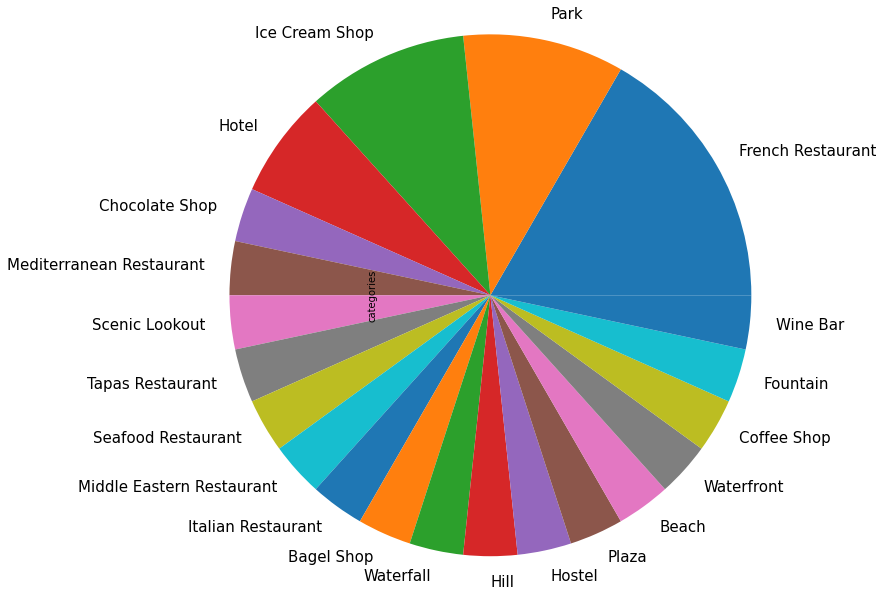

In [22]:
# Generating a pie plot 
import matplotlib.pyplot as plt
df_explore['categories'].value_counts().plot(kind='pie',radius=3,textprops = {"fontsize":15} )

From the above statistics, we can see that the **top 3 popular venues** within 5000 meters are:
1. **French Restaurant**
2. **Icecream shops**
3. **Hotels**

### Now we will analyze the restaurant data .Let's visualize the location of these restaurants.

In [23]:
Nice_rest_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Nice
# add a red circle marker to represent Nice
folium.CircleMarker(
    [latitude, longitude],
    radius=30,
    color='green',
    popup='NICE',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.5
).add_to(Nice_rest_map )

# add popular restaurants to the map as blue circle markers
for lat, lng, label in zip(restaurant_df.lat, restaurant_df.lng, restaurant_df.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(Nice_rest_map)

# display map
Nice_rest_map

Let's see the various categories of restaurants present using the value_counts() method.

In [24]:
## Finding the frequency of each type of restaurants
restaurant_df['categories'].value_counts()

French Restaurant            6
Italian Restaurant           5
Diner                        3
Restaurant                   3
Middle Eastern Restaurant    2
Mediterranean Restaurant     2
Indian Restaurant            2
Turkish Restaurant           1
Japanese Restaurant          1
Lebanese Restaurant          1
Vietnamese Restaurant        1
Seafood Restaurant           1
Thai Restaurant              1
Name: categories, dtype: int64

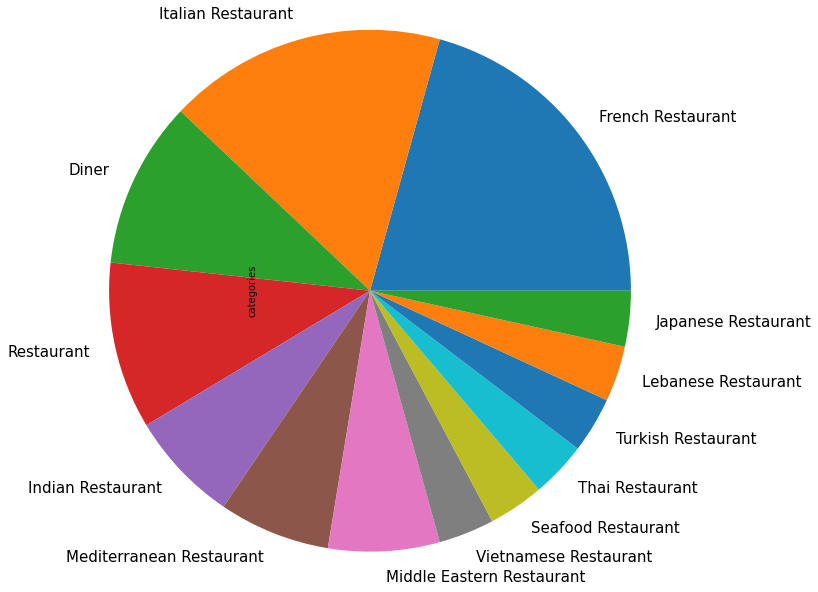

In [50]:
# Generating a pie plot 
import matplotlib.pyplot as plt
restaurant_df['categories'].value_counts().plot(kind='pie',radius=3,textprops = {"fontsize":15})

From above statistics we can see that the **top 3 restaurant types**within 5000 meters radius is:
1. **French Restaurants**
2. **Italian Restaurant**
3. **Diners**

## 4. RESULTS AND DISCUSSION

After analyzing the **venues data** ,we can see that there are total **30 popular venues within a radius of 5000 meters** from the center of Nice. 
Out of these 30 venues, the **three most popular venues/business are: French Restaurants, ice cream shops and hotels.**

Nice being a very popular tourist destination attracts a large number of tourists from all over the world every year.So hotels will be one of the top popular venues or business here.This absolutely correlates with our findings from venues data.
As Nice is located in a coastal region, it has gained popularity for stunning beaches.Due to its location, Nice enjoys a warm climate for maximum time of the year which is why ice cream shops are the second most popular venues here.
Food is a very attractive business for tourist areas hence French restaurants lists the top of popular venues.

From the **analysis of restaurants data** ,we have found that there are total **30 popular restaurants within 5000 meters radius** from the center of Nice.
**The top three restaurants category are: French, Italian and basic diners.**

As French cuisine is the local cuisine ,no wonder its the top most category.The second most dominant cuisine is Italian cuisine.Italian food is loved all over the world hence it is the second most popular restaurant type in Nice.

Using Folium,the location of top venues and restaurants were visualized.It can be seen that they are mostly concentrated around the promenade region and the city center.

## 5. CONCLUSION
After analyzing the data and gaining various insights from it, I would like to suggest a client or possible stakeholders to invest in food business like Restaurants as we have seen that Restaurants are the most popular venues in Nice.
Since French restaurants and Italian restaurants are the highest in numbers,it would be wise to invest in other cuisine type to avoid huge competition.We know that Mediterranean cuisine is gaining popularity nowadays,so investing in a mediterranean restaurant will be a better option as there are only two mediterranean restaurants in Nice.
Another good business can be investing in an icecream shop which must be preferrably located close to the promenade or waterfront.